In [ ]:
import torch
import sklearn


In [ ]:
from sklearn.datasets import make_classification
torch.manual_seed(123)

In [ ]:
## Make a Toy Dataset
X,y=make_classification(n_samples=1000,n_features=4 ,n_classes=2)

### Change it into the Tensor
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)



In [ ]:
### Data Suffling
torch.manual_seed(10)
suffle_idx=torch.randperm(y.size(0),dtype=torch.long)
X,y=X[suffle_idx],y[suffle_idx]
suffle_idx[:10]

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])

In [ ]:
#### Train Test split
train_size=int(suffle_idx.size(0)*0.7)
train_idx= suffle_idx[:train_size]
test_idx=suffle_idx[train_size:]
X_train,y_train=X[train_idx],y[train_idx]
X_test,y_test=X[test_idx],y[test_idx]

In [ ]:
X_train.shape

torch.Size([700, 4])

In [ ]:
X_test.shape

torch.Size([300, 4])

In [ ]:
#### Normalize

mean,std_dev=X_train.mean(dim=0) ,X_train.std(dim=0)
X_train=(X_train-mean)/std_dev
X_test=(X_test-mean)/std_dev

In [ ]:
import torch.nn as nn
from torch.autograd import grad

In [ ]:
class NN():
  def __init__(self,n_features):
    self.n_features=n_features
    self.weight=torch.zeros(size=(n_features,1),dtype=torch.float,requires_grad=True)
    self.bias=torch.zeros(1,dtype=torch.float,requires_grad=True)
  

  def forward(self,x):
    output=torch.add(torch.mm(x,self.weight),self.bias)
    return output.view(-1)

def loss_fn(yhat,y):
  return torch.mean((yhat-y)**2)


In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      yhat=model.forward(x[idx])
      loss=loss_fn(yhat,y[idx])


      grad_w=grad(loss,model.weight,retain_graph=True)[0]
      grad_b=grad(loss,model.bias)[0]

      model.weight=model.weight-lr*grad_w
      model.bias=model.bias-lr*grad_b


    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost




In [ ]:
model=NN(X_train.size(1))
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.45886
Epoc:   2 | MSE  0.42877
Epoc:   3 | MSE  0.40201
Epoc:   4 | MSE  0.37814
Epoc:   5 | MSE  0.35681
Epoc:   6 | MSE  0.33764
Epoc:   7 | MSE  0.32035
Epoc:   8 | MSE  0.30470
Epoc:   9 | MSE  0.29051
Epoc:  10 | MSE  0.27759
Epoc:  11 | MSE  0.26578
Epoc:  12 | MSE  0.25497
Epoc:  13 | MSE  0.24505
Epoc:  14 | MSE  0.23590
Epoc:  15 | MSE  0.22746
Epoc:  16 | MSE  0.21965
Epoc:  17 | MSE  0.21241
Epoc:  18 | MSE  0.20567
Epoc:  19 | MSE  0.19940
Epoc:  20 | MSE  0.19356
Epoc:  21 | MSE  0.18811
Epoc:  22 | MSE  0.18301
Epoc:  23 | MSE  0.17824
Epoc:  24 | MSE  0.17376
Epoc:  25 | MSE  0.16956
Epoc:  26 | MSE  0.16562
Epoc:  27 | MSE  0.16192
Epoc:  28 | MSE  0.15844
Epoc:  29 | MSE  0.15516
Epoc:  30 | MSE  0.15207
Epoc:  31 | MSE  0.14916
Epoc:  32 | MSE  0.14642
Epoc:  33 | MSE  0.14383
Epoc:  34 | MSE  0.14139
Epoc:  35 | MSE  0.13908
Epoc:  36 | MSE  0.13691
Epoc:  37 | MSE  0.13486
Epoc:  38 | MSE  0.13292
Epoc:  39 | MSE  0.13109
Epoc:  40 | MSE  0.12936


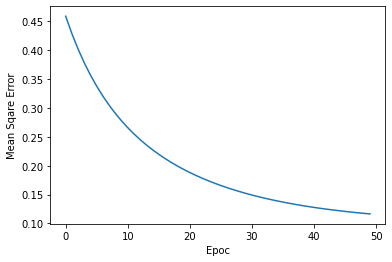

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(cost)),cost)
plt.ylabel('Mean Sqare Error')
plt.xlabel('Epoc')
plt.show()

In [ ]:
ones=torch.ones(y_train.size())
zero=torch.zeros(y_train.size())
train_pred=model.forward(X_train)
train_acc=torch.mean((  
    torch.where(train_pred > 0.5,
                ones,zero).int()==y_train).float())


ones=torch.ones(y_test.size())
zeros=torch.zeros(y_test.size())
test_pred=model.forward(X_test)
test_acc=torch.mean((torch.where(test_pred> 0.5,ones,zeros).int()==y_test).float())

print('Training Accuracy: %.2f' % (train_acc*100))
print('Testing Accuracy: %.2f' % (test_acc*100))


Training Accuracy: 87.00
Testing Accuracy: 88.00


### Model Using Pytorch

In [ ]:
import torch
import sklearn

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X,y=make_classification(n_samples=1000,n_classes=2,n_features=4)
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [ ]:
class NNpt(nn.Module):
  def __init__(self,n_features):
    super(NNpt,self).__init__()
    self.linear=nn.Linear(n_features,1)

    self.linear.weight.detach().zero_()
    self.linear.bias.detach().zero_()


  def forward(self,x):
    out=self.linear(x)
    return out.view(-1)



    

In [ ]:
def train(model,x,y,n_epoch=10,lr=0.001,seed=23,bsz=50):

  cost=[]
  torch.manual_seed(seed)

  optimizer=torch.optim.SGD(model.parameters(),lr=lr)
  for i in range(n_epoch):
    suffle_idx=torch.randperm(y.size(0))
    batches=torch.split(suffle_idx,bsz)

    for idx in batches:
      yhat=model.forward(x[idx])
      loss=torch.nn.functional.mse_loss(yhat,y[idx])


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      #model.weight=model.weight-lr*grad_w
      #model.bias=model.bias-lr*grad_b


    with torch.no_grad():
      yhat=model.forward(x)
      curr_loss=loss_fn(yhat,y)
      print('Epoc: %3d ' % (i+1),end="")
      print('| MSE % .5f' % curr_loss)
      cost.append(curr_loss)
      
  return cost

In [ ]:
n_feature=X_train.size(1)
model=NNpt(n_features=n_feature)


In [ ]:
cost=train(model,X_train,y_train,n_epoch=50)

Epoc:   1 | MSE  0.45849
Epoc:   2 | MSE  0.42652
Epoc:   3 | MSE  0.39790
Epoc:   4 | MSE  0.37225
Epoc:   5 | MSE  0.34918
Epoc:   6 | MSE  0.32841
Epoc:   7 | MSE  0.30965
Epoc:   8 | MSE  0.29267
Epoc:   9 | MSE  0.27726
Epoc:  10 | MSE  0.26326
Epoc:  11 | MSE  0.25051
Epoc:  12 | MSE  0.23886
Epoc:  13 | MSE  0.22821
Epoc:  14 | MSE  0.21846
Epoc:  15 | MSE  0.20951
Epoc:  16 | MSE  0.20127
Epoc:  17 | MSE  0.19367
Epoc:  18 | MSE  0.18665
Epoc:  19 | MSE  0.18017
Epoc:  20 | MSE  0.17417
Epoc:  21 | MSE  0.16860
Epoc:  22 | MSE  0.16343
Epoc:  23 | MSE  0.15862
Epoc:  24 | MSE  0.15414
Epoc:  25 | MSE  0.14996
Epoc:  26 | MSE  0.14606
Epoc:  27 | MSE  0.14241
Epoc:  28 | MSE  0.13900
Epoc:  29 | MSE  0.13582
Epoc:  30 | MSE  0.13283
Epoc:  31 | MSE  0.13003
Epoc:  32 | MSE  0.12740
Epoc:  33 | MSE  0.12494
Epoc:  34 | MSE  0.12262
Epoc:  35 | MSE  0.12045
Epoc:  36 | MSE  0.11840
Epoc:  37 | MSE  0.11648
Epoc:  38 | MSE  0.11467
Epoc:  39 | MSE  0.11296
Epoc:  40 | MSE  0.11136


[]

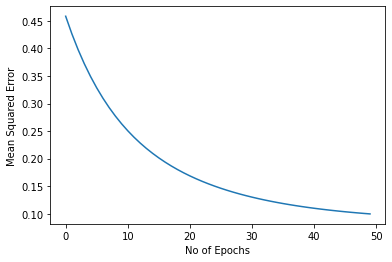

In [ ]:
plt.plot(range(len(cost)),cost)
plt.xlabel('No of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()

In [ ]:
ones=torch.ones(y_train.size(0))
zero=torch.zeros(y_train.size(0))
train_pred=model.forward(X_train)

train_acc=torch.mean((torch.where( train_pred >0.5 , ones,zero).int()==y_train).float())
#print(train_acc)

ones=torch.ones(y_test.size(0))
zero=torch.zeros(y_test.size(0))
test_pred=model.forward(X_test)

test_acc=torch.mean((torch.where( test_pred >0.5 , ones,zero).int()==y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)

Training Accuracy : 0.88
Testing Accuracy: 0.89
